# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In this particular example I used Tesla(TSLA) stock price historical data from Yahoo Finance, but by changing the csv file, any other stock data can be examined.

*Note: Don't forget to switch to GPU mode for faster computations if you use Google Colab :)* 

## Importing all the necessary libraries

Import the following libraries:
  1. **pandas** for data manipulation and analysis
  2. **fbproghet** for forcasting
  3. **plotly** for data visualization





In [1]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [2]:
# initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the dataset & exploring it

In [3]:
stock_df = pd.read_csv('TSLA.csv')

In [4]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
1,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
2,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
3,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900
4,2021-03-12,670.000000,694.880005,666.140015,693.729980,693.729980,33583800
...,...,...,...,...,...,...,...
248,2022-03-01,869.679993,889.880005,853.780029,864.369995,864.369995,24922300
249,2022-03-02,872.130005,886.479980,844.270020,879.890015,879.890015,24881100
250,2022-03-03,878.770020,886.440002,832.599976,839.289978,839.289978,20541200
251,2022-03-04,849.099976,855.650024,825.159973,838.289978,838.289978,22333200


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [6]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,805.028419,822.502646,786.218618,804.631895,804.631895,2.630644e+07
std,174.831717,180.586930,166.893802,173.773666,173.773666,1.006862e+07
min,552.549988,566.210022,546.979980,563.000000,563.000000,9.800600e+06
25%,671.760010,686.549988,657.700012,670.940002,670.940002,1.892490e+07
50%,740.000000,749.409973,728.030029,739.380005,739.380005,2.437940e+07
75%,928.179993,946.270020,903.210022,931.250000,931.250000,3.121550e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.752330e+07


## Data visualization using plotly express - visualizing the historical performance of Tesla

Analyzing price and volume using different graphs, such as line graph, area graph and box plot.

In [7]:
px.line(stock_df, x='Date', y='Close')

In [8]:
px.area(stock_df, x='Date', y='Volume')

In [9]:
px.bar(stock_df, y='Volume')

In [10]:
px.box(stock_df, y='Close')

## Understanding Facebook Prophet

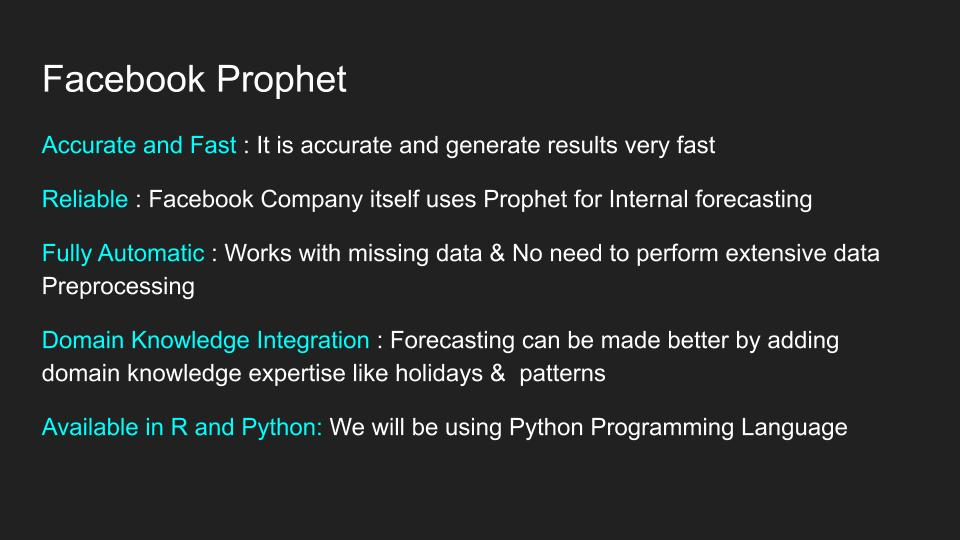

## Data Preperation

In [11]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
1,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
2,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
3,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900
4,2021-03-12,670.000000,694.880005,666.140015,693.729980,693.729980,33583800
...,...,...,...,...,...,...,...
248,2022-03-01,869.679993,889.880005,853.780029,864.369995,864.369995,24922300
249,2022-03-02,872.130005,886.479980,844.270020,879.890015,879.890015,24881100
250,2022-03-03,878.770020,886.440002,832.599976,839.289978,839.289978,20541200
251,2022-03-04,849.099976,855.650024,825.159973,838.289978,838.289978,22333200


In [12]:
columns = ['Date', 'Close']
new_df = pd.DataFrame(stock_df, columns=columns)

In [13]:
new_df

,Date,Close
0,2021-03-08,563.000000
1,2021-03-09,673.580017
2,2021-03-10,668.059998
3,2021-03-11,699.599976
4,2021-03-12,693.729980
...,...,...
248,2022-03-01,864.369995
249,2022-03-02,879.890015
250,2022-03-03,839.289978
251,2022-03-04,838.289978


In [14]:
prophet_df = new_df.rename(columns={'Date': 'ds', 'Close': 'y'})

In [15]:
prophet_df

,ds,y
0,2021-03-08,563.000000
1,2021-03-09,673.580017
2,2021-03-10,668.059998
3,2021-03-11,699.599976
4,2021-03-12,693.729980
...,...,...
248,2022-03-01,864.369995
249,2022-03-02,879.890015
250,2022-03-03,839.289978
251,2022-03-04,838.289978


## Creating Facebook Prophet Model

In [16]:
model = Prophet()
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [17]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-08,660.724981,605.321876,753.699860,660.724981,660.724981,22.931796,22.931796,22.931796,22.931796,22.931796,22.931796,0.0,0.0,0.0,683.656777
1,2021-03-09,660.166051,612.026273,747.866532,660.166051,660.166051,21.985341,21.985341,21.985341,21.985341,21.985341,21.985341,0.0,0.0,0.0,682.151392
2,2021-03-10,659.607121,611.766470,760.363998,659.607121,659.607121,23.520028,23.520028,23.520028,23.520028,23.520028,23.520028,0.0,0.0,0.0,683.127149
3,2021-03-11,659.048191,606.951211,750.951030,659.048191,659.048191,16.911906,16.911906,16.911906,16.911906,16.911906,16.911906,0.0,0.0,0.0,675.960097
4,2021-03-12,658.489261,603.019712,750.930905,658.489261,658.489261,15.668192,15.668192,15.668192,15.668192,15.668192,15.668192,0.0,0.0,0.0,674.157453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-04-02,764.139020,637.031119,783.906748,749.511407,779.155843,-50.508631,-50.508631,-50.508631,-50.508631,-50.508631,-50.508631,0.0,0.0,0.0,713.630389
279,2022-04-03,761.673429,628.755312,784.695289,745.860886,778.177511,-50.508631,-50.508631,-50.508631,-50.508631,-50.508631,-50.508631,0.0,0.0,0.0,711.164798
280,2022-04-04,759.207838,704.065754,858.945398,741.665928,777.154384,22.931796,22.931796,22.931796,22.931796,22.931796,22.931796,0.0,0.0,0.0,782.139634
281,2022-04-05,756.742246,703.830521,859.646112,738.160171,775.447023,21.985341,21.985341,21.985341,21.985341,21.985341,21.985341,0.0,0.0,0.0,778.727587


In [19]:
px.line(forecast, x='ds', y='yhat')

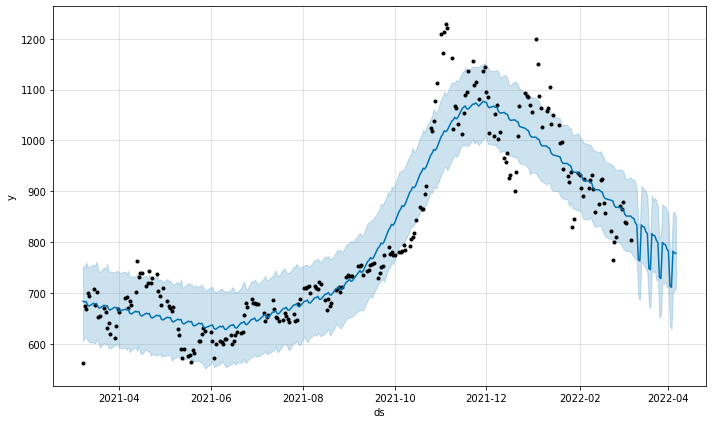

In [20]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

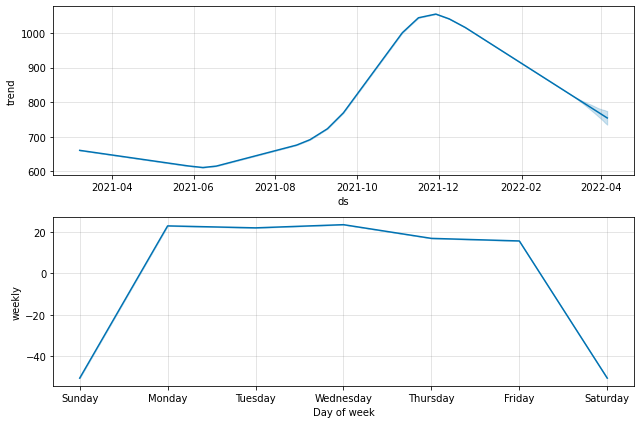

In [21]:
figure2 = model.plot_components(forecast)

##Downloading the Forecast data

In [22]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>